In [94]:
import pandas as pd 
import numpy as np 
from statsmodels.discrete.discrete_model import Logit 
import statsmodels.tools as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [95]:
data = pd.read_csv('turnover_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'turnover_data.csv'

In [ ]:
data.head(5)

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

In [ ]:
data_num=data.select_dtypes(exclude="object")
data_obj=data.select_dtypes(include="object")

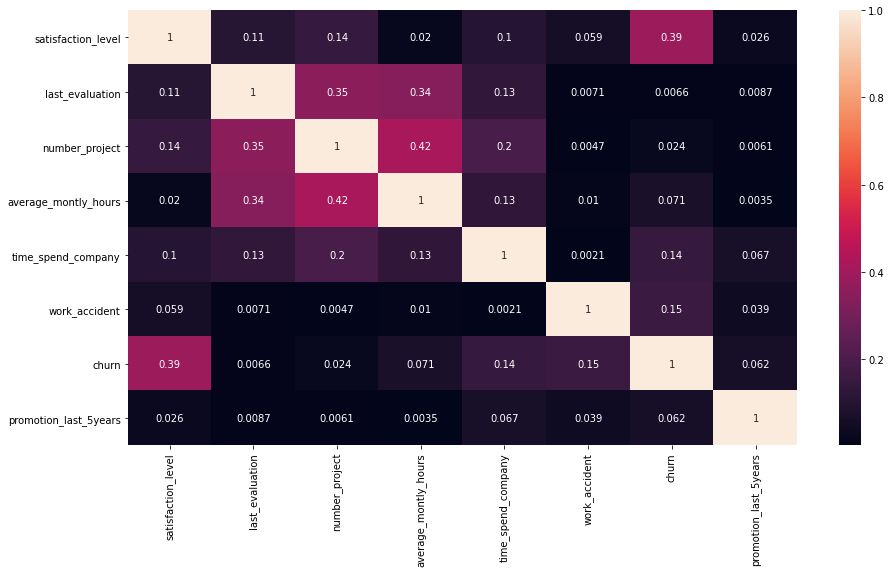

In [96]:
plt.figure(figsize=(15,8))
sns.heatmap(data_num.corr().abs(), annot=True)
plt.show()

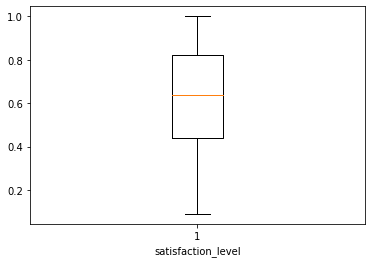

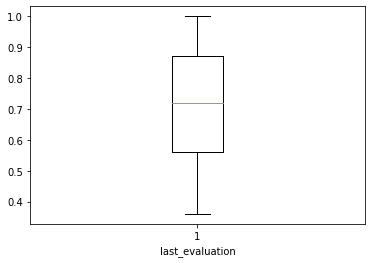

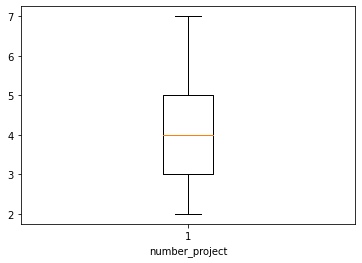

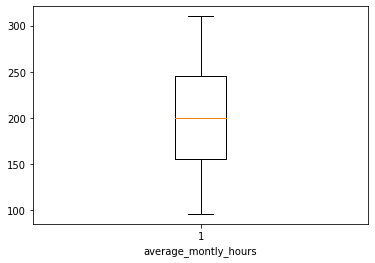

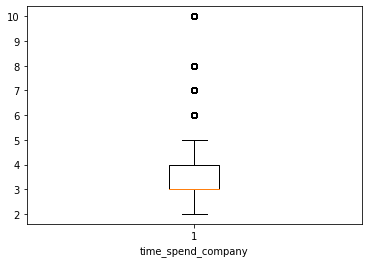

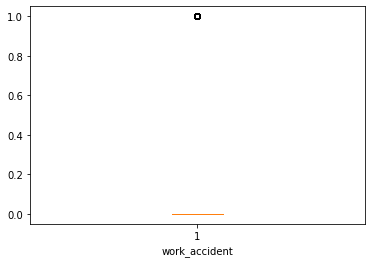

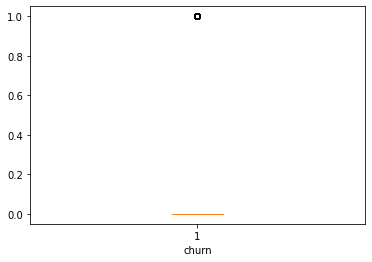

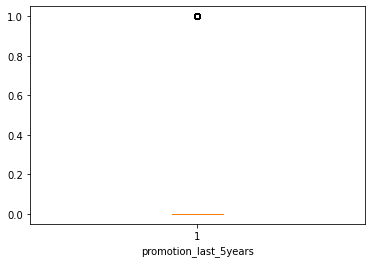

In [77]:
for i in data_num.columns.tolist():
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

In [78]:
data_obj['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [79]:
data_obj['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [80]:
data.groupby(by="salary")["churn"].mean()

salary
high      0.066289
low       0.296884
medium    0.204313
Name: churn, dtype: float64

<AxesSubplot:xlabel='department'>

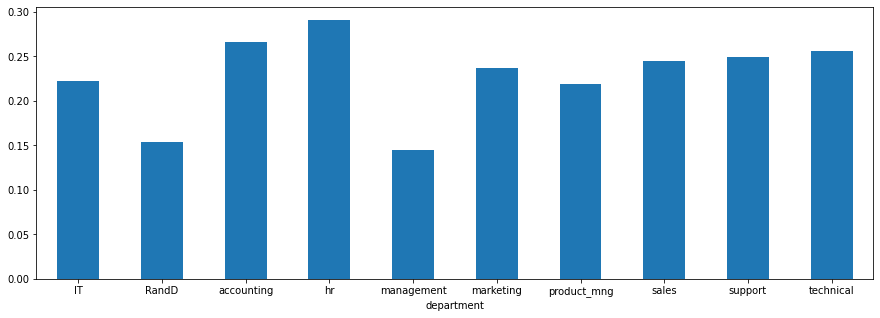

In [81]:
data.groupby(by="department")["churn"].mean().plot(kind='bar', figsize=(15,5), rot=0)

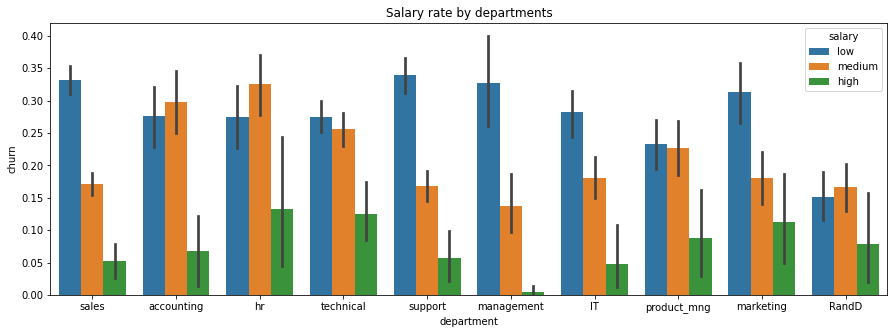

In [84]:
plt.figure(figsize=(15,5))
sns.barplot(x="department", y="churn", hue="salary", data=data)
plt.title("Salary rate by departments")
plt.show()

In [45]:
data_dummies=pd.get_dummies(data_obj,prefix=data_obj.columns,drop_first=True)

In [48]:
data=data_num.join(data_dummies)

## Modeling

In [51]:
data['churn'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: churn, dtype: float64

76.2% of customers DO NOT churn. This means that without any model we will probably clasify a new record (a new customer) as 0, but we want to do better than this very naive classification.

In [53]:
Y = data.churn
X = data.drop("churn",axis=1)
X = sm.add_constant(X)

In [54]:
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [56]:
model = Logit(Y0, X0)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.426662
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                11249
Model:                          Logit   Df Residuals:                    11230
Method:                           MLE   Df Model:                           18
Date:                Sat, 03 Oct 2020   Pseudo R-squ.:                  0.2220
Time:                        01:26:43   Log-Likelihood:                -4799.5
converged:                       True   LL-Null:                       -6169.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6772      0.220     -7.622      0.000      -2.108      -1.246
satisfaction_level        -4.1914      0.114    -36.915      0.000      -4.414      -3.969
last_evaluation            0.6789      0.172      3.936      0.000       0.341       1.017
number_project            -0.3066      0.025    -12.480      0.000      -0.355      -0.258
average_montly_hours       0.0047      0.001      7.820      0.000       0.004       0.006
time_spend_company         0.2646      0.018     14.683      0.000       0.229       0.300
work_accident             -1.5052      0.103    -14.657      0.000      -1.706      -1.304
promotion_last_5years     -1.3486      0.290     -4.649      0.000      -1.917      -0.780
department_RandD          -0.5731      0.161     -3.556      0.000      -0.889      -0.257
department_accounting      0.1222      0.141      0.864      0.388      -0.155       0.400
department_hr              0.4125      0.142      2.912      0.004       0.135       0.690
department_management     -0.2649      0.172     -1.541      0.123      -0.602       0.072
department_marketing       0.2000      0.141      1.414      0.157      -0.077       0.477
department_product_mng     0.0736      0.136      0.540      0.590      -0.194       0.341
department_sales           0.1398      0.103      1.355      0.175      -0.062       0.342
department_support         0.1817      0.113      1.610      0.107      -0.039       0.403
department_technical       0.2437      0.109      2.239      0.025       0.030       0.457
salary_low                 1.9639      0.151     13.028      0.000       1.668       2.259
salary_medium              1.4705      0.152      9.704      0.000       1.173       1.767
==========================================================================================
"""

- <b> For a one-unit increase in satisfaction_level we expect on average a 4.1914 decrease in the log-odds of churn, holding all other independent variables constant.</b>
- <b> For employees with low salaries, we expect on average a 1.9639 increase in the log-odds of the dependent variable churn compared to the employees with high salaries.</b>

In [85]:
# for interpreting probabilites, we need to get marginal effects
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  churn
Method:                          dydx
At:                           overall
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
satisfaction_level        -0.5748      0.012    -48.250      0.000      -0.598      -0.551
last_evaluation            0.0931      0.024      3.944      0.000       0.047       0.139
number_project            -0.0420      0.003    -12.712      0.000      -0.049      -0.036
average_montly_hours       0.0006   8.14e-05      7.892      0.000       0.000       0.001
time_spend_company         0.0363      0.002     15.133      0.000       0.032       0.041
work_accident             -0.2064      0.014    -15.043      0.000      -0.233      -0.180
promotion_last_5years     -0.1849      0.040     -4.660      0.000      -0.263      -0.107
department_RandD          -0.0786      0.022     -3.562      0.000      -0.122      -0.035
department_accounting      0.0168      0.019      0.864      0.388      -0.021       0.055
department_hr              0.0566      0.019      2.916      0.004       0.019       0.095
department_management     -0.0363      0.024     -1.542      0.123      -0.083       0.010
department_marketing       0.0274      0.019      1.414      0.157      -0.011       0.065
department_product_mng     0.0101      0.019      0.540      0.589      -0.027       0.047
department_sales           0.0192      0.014      1.355      0.175      -0.009       0.047
department_support         0.0249      0.015      1.611      0.107      -0.005       0.055
department_technical       0.0334      0.015      2.240      0.025       0.004       0.063
salary_low                 0.2693      0.020     13.292      0.000       0.230       0.309
salary_medium              0.2017      0.021      9.802      0.000       0.161       0.242
==========================================================================================
"""

- <b> An Incremental increase in satisfaction level will decrease the probability of churn on average by 57.48% when other factors are held constant.</b>
- <b> Employees with low salary have on average 26.93% higher probability of churn compared to employees with high salaries.</b>

In [58]:
Y0_hat = results.predict(X0)
Y1_hat = results.predict(X1)

In [59]:
threshold = 0.5
Y0_class = np.where(Y0_hat > threshold, 1, 0)
Y1_class = np.where(Y1_hat> threshold, 1, 0)

In [62]:
print("General Accuracy Train:", accuracy_score(Y0, Y0_class))
print("General Accuracy Test:", accuracy_score(Y1, Y1_class))

General Accuracy Train: 0.7911814383500756
General Accuracy Test: 0.7850666666666667


In [60]:
print("Recall Train:", recall_score(Y0, Y0_class))
print("Recall Test:", recall_score(Y1, Y1_class))

Recall Train: 0.34966342557965596
Recall Test: 0.34002229654403565


In [61]:
print("ROC AUC Train:", roc_auc_score(Y0, Y0_hat))
print("ROC AUC Test:", roc_auc_score(Y1, Y1_hat))

ROC AUC Train: 0.8218928849454088
ROC AUC Test: 0.8187618423525705


<b> METRICS </b>

<b> Accuracy=(TP+TN)/(TP+TN+FP+FN)</b> The ratio of correctly predicted observation to the total observations

<b> Precision=TP/TP+FP</b> Out of all the positive classes we have predicted correctly, how many are actually positive.

<b>Recall(Sensitivity)=TP/TP+FN </b>  Out of all the positive classes, how much we predicted correctly.

<b>Specificity=TN/TN+FP </b>  Out of all the positive classes, how much we predicted correctly.

<b>F1 Score:</b>This is a harmonic mean (2xPrecisionxRecall/Precision+Recall) of the true positive rate (recall) and precision. 

In [90]:
cm_train = confusion_matrix(Y0, Y0_class).T
print(cm_train)

[[7965 1739]
 [ 610  935]]


In [91]:
#let's calculate overall accuracy, recall and specificity by hand for the train set
#let's calculate overall accuracy, recall and specificity for train data
print("Accuracy_train:", (cm_train[0,0]+cm_train[1,1])/len(Y0))
print("Sensitivity_train:",cm_train[1,1]/(cm_train[1,1]+cm_train[0,1]))
print("Specificity_train:",cm_train[0,0]/(cm_train[0,0]+cm_train[1,0]))

Accuracy_train: 0.7911814383500756
Sensitivity_train: 0.34966342557965596
Specificity_train: 0.928862973760933


In [92]:
#confusion matrix for the test data
cm_test=confusion_matrix(Y1,Y1_class).T

In [93]:
#let's calculate overall accuracy, recall and specificity for test data
print("Accuracy_test:", (cm_test[0,0]+cm_test[1,1])/len(Y1))
print("Sensitivity_test:",cm_test[1,1]/(cm_test[1,1]+cm_test[0,1]))
print("Specificity_test:",cm_test[0,0]/(cm_test[0,0]+cm_test[1,0]))


Accuracy_test: 0.7850666666666667
Sensitivity_test: 0.34002229654403565
Specificity_test: 0.9249912372940764


In [89]:
#calculating using classification report
print("Logistic Regression Train:")
print(classification_report(Y0,Y0_class))

print("Logistic Regression Test:")
print(classification_report(Y1,Y1_class))

Logistic Regression Train:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      8575
           1       0.61      0.35      0.44      2674

    accuracy                           0.79     11249
   macro avg       0.71      0.64      0.66     11249
weighted avg       0.77      0.79      0.77     11249

Logistic Regression Test:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2853
           1       0.59      0.34      0.43       897

    accuracy                           0.79      3750
   macro avg       0.70      0.63      0.65      3750
weighted avg       0.76      0.79      0.76      3750



We can see that although the metrics are good for 0s, our model is not doing a good job when predicting 1s. This may be a problem 
of unbalanced data, not using cross-validation and hyperparameter tuning.